# 하이퍼파라미터 튜닝 모듈화

## #01. 준비작업

### [1] 패키지 가져오기

In [5]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.tensor import *
from hossam.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기

In [6]:
origin = my_read_excel("https://data.hossam.kr/mldata/fish.xlsx", info=False)


상위 5개 행
+----+--------+--------+--------+--------+
|    |   길이 |   높이 |   두께 |   무게 |
|----+--------+--------+--------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |     32 |
|  2 |     15 |   3.82 |   2.43 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |     70 |
+----+--------+--------+--------+--------+


## #02. 데이터 전처리

### [1] 데이터 스케일링

In [7]:
df = my_minmax_scaler(data=origin, yname="무게")

my_pretty_table(data=df.head())

+----+----------+----------+-----------+--------+
|    |     길이 |     높이 |      두께 |   무게 |
|----+----------+----------+-----------+--------|
|  0 |        0 |        0 |         0 |    5.9 |
|  1 | 0.148876 | 0.132834 | 0.0876672 |     32 |
|  2 | 0.185393 | 0.159963 |   0.15156 |     40 |
|  3 | 0.219101 | 0.231993 |  0.181278 |   51.5 |
|  4 | 0.252809 | 0.231993 |   0.22734 |     70 |
+----+----------+----------+-----------+--------+


### [2] 훈련/검증 데이터 분할

In [8]:
x_train, x_test, y_train, y_test = my_train_test_split(df, "무게")
rows, cols = x_train.shape

## #03. 하이퍼파라미터 튜닝

### [1] 훈련 모델 적합

모듈화 된 기능으로부터 최적의 하이퍼파라미터가 셋팅된 model 객체를 리턴받는다.

In [9]:
model = tf_tune(
    x_train=x_train,
    y_train = y_train,
    x_test=x_test,
    y_test=y_test,
    dense_tune=[
        {'units':[64,32,16,8], 'activation':'relu',
         'input_shape': (cols,)},
        {'units':[32,16,8,4], 'activation':'relu',
         },
        {'units':1,  'activation':'linear'},
    ],
    optimizer='adam',
    loss='mse',
    metrics=['mae'],
    learning_rate=[0.01, 0.001,0.0001])

model.summary()
        

Trial 18 Complete [00h 00m 02s]
val_mae: 334.6955261230469

Best val_mae So Far: 334.6955261230469
Total elapsed time: 00h 00m 32s


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

### [2] 최적 모델에 대한 학습 및 결과 확인

+-------+---------+---------+
|       |    loss |     mae |
|-------+---------+---------|
| train | 57029.1 | 215.036 |
| test  | 28369.9 | 164.314 |
+-------+---------+---------+


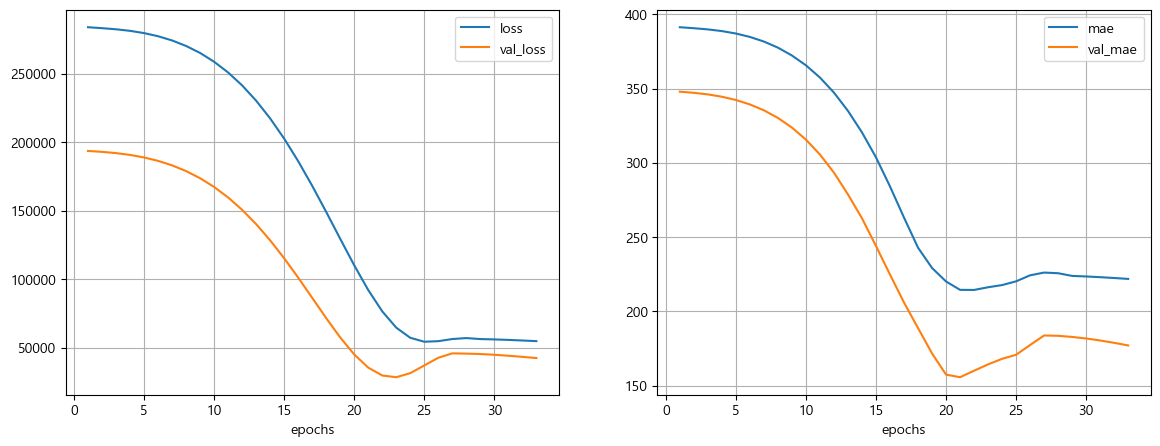

In [10]:
result = tf_train(
    model=model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
tf_result(result=result)

+-------+---------+---------+
|       |    loss |     mae |
|-------+---------+---------|
| train | 54553.6 | 210.812 |
| test  | 27235.3 | 161.207 |
+-------+---------+---------+


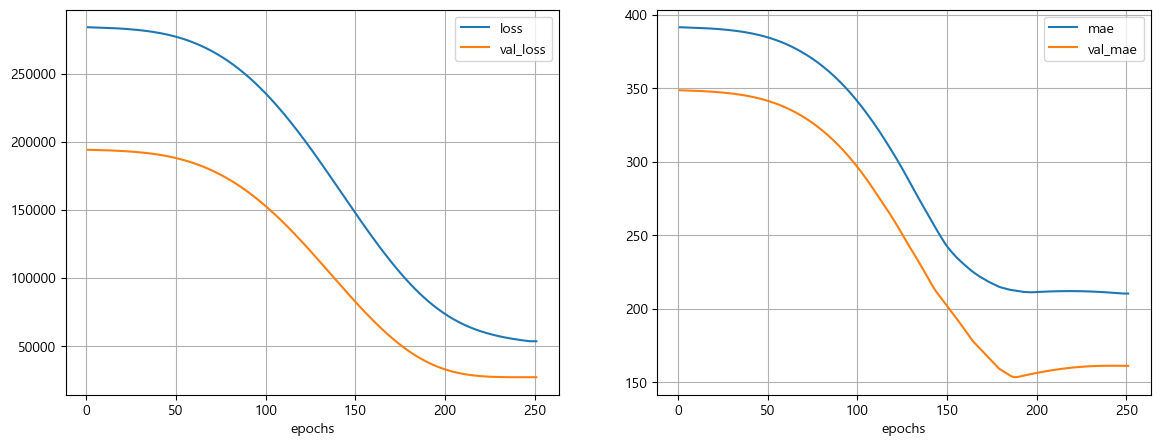

<Sequential name=sequential_2, built=True>

In [12]:
my_tf_linear(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)